In [1]:
print('Taslim Ansari 221P010')

Taslim Ansari 221P010


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
class LinearRegressionApp:
    def __init__(self, root):
        self.root = root
        self.root.title('Linear Regression Analysis')
        self.root.geometry('1000x600')

        # Load your data here (make sure 'placement.csv' exists in your working directory)
        self.df = pd.read_csv('placement.csv')

        # Setup Matplotlib figure and canvas inside Tkinter window
        self.fig, self.ax = plt.subplots(figsize=(5, 5))
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

        # Create right-side widgets
        self.create_widgets()

        # Initial plot
        self.initial_plot()

    def create_widgets(self):
        self.frame_right = tk.Frame(self.root)
        self.frame_right.pack(side=tk.LEFT, padx=20, fill=tk.Y)

        self.label_info = tk.Label(self.frame_right, text='Select Analysis:')
        self.label_info.pack(pady=10)

        self.combo_analysis = ttk.Combobox(self.frame_right, values=[
            'Initial Data',
            'First Linear Regression',
            'With Random Feature',
            'With IQ Feature'
        ])
        self.combo_analysis.pack()
        self.combo_analysis.bind("<<ComboboxSelected>>", self.update_analysis)

        self.label_metrics = tk.Label(self.frame_right, text='Metrics:')
        self.label_metrics.pack(pady=10)

        self.text_metrics = tk.Text(self.frame_right, width=40, height=15)
        self.text_metrics.pack()

    def initial_plot(self):
        self.ax.clear()
        self.ax.scatter(self.df['cgpa'], self.df['package'])
        self.ax.set_xlabel('CGPA')
        self.ax.set_ylabel('Package (in LPA)')
        self.ax.set_title('Initial Data Scatter Plot')
        self.canvas.draw()
        self.text_metrics.delete(1.0, tk.END)

    def update_analysis(self, event):
        analysis = self.combo_analysis.get()
        if analysis == 'Initial Data':
            self.initial_plot()
        elif analysis == 'First Linear Regression':
            self.first_linear_regression()
        elif analysis == 'With Random Feature':
            self.with_random_feature()
        elif analysis == 'With IQ Feature':
            self.with_iq_feature()

    def first_linear_regression(self):
        X = self.df[['cgpa']]
        y = self.df['package']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)

        self.display_metrics(y_test, y_pred, X_test.shape[0], X_test.shape[1])

        self.ax.clear()
        self.ax.scatter(self.df['cgpa'], self.df['package'])
        # Plot regression line on training data
        sorted_idx = X_train['cgpa'].argsort()
        self.ax.plot(X_train['cgpa'].iloc[sorted_idx], lr.predict(X_train.iloc[sorted_idx]), color='red')
        self.ax.set_xlabel('CGPA')
        self.ax.set_ylabel('Package (in LPA)')
        self.ax.set_title('Linear Regression on CGPA')
        self.canvas.draw()

    def with_random_feature(self):
        new_df = self.df.copy()
        new_df['random_feature'] = np.random.random(new_df.shape[0])
        X = new_df[['cgpa', 'random_feature']]
        y = new_df['package']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)

        self.display_metrics(y_test, y_pred, X_test.shape[0], X_test.shape[1])

        self.ax.clear()
        self.ax.scatter(new_df['random_feature'], new_df['package'])
        self.ax.set_xlabel('Random Feature')
        self.ax.set_ylabel('Package (in LPA)')
        self.ax.set_title('Regression with Random Feature')
        self.canvas.draw()

    def with_iq_feature(self):
        new_df = self.df.copy()
        # Create 'iq' as package + random noise between -12 and 12
        new_df['iq'] = new_df['package'] + np.random.randint(-12, 13, new_df.shape[0])
        X = new_df[['cgpa', 'iq']]
        y = new_df['package']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)

        self.display_metrics(y_test, y_pred, X_test.shape[0], X_test.shape[1])

        self.ax.clear()
        self.ax.scatter(new_df['iq'], new_df['package'])
        self.ax.set_xlabel('IQ')
        self.ax.set_ylabel('Package (in LPA)')
        self.ax.set_title('Regression with IQ Feature')
        self.canvas.draw()

    def display_metrics(self, y_test, y_pred, n, p):
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

        metrics_text = (
            f"MAE: {mae:.2f}\n"
            f"MSE: {mse:.2f}\n"
            f"RMSE: {rmse:.2f}\n"
            f"R2 Score: {r2:.2f}\n"
            f"Adjusted R2: {adj_r2:.2f}"
        )
        self.text_metrics.delete(1.0, tk.END)
        self.text_metrics.insert(tk.END, metrics_text)

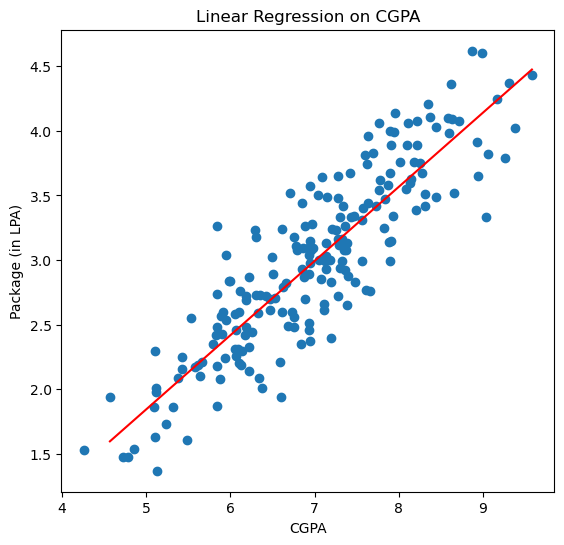

In [4]:
if __name__ == "__main__":
    root = tk.Tk()
    app = LinearRegressionApp(root)
    root.mainloop()